In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv('2013_HASDM_500-575KM.txt', delim_whitespace=True, header=None)

In [259]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,2013,1,0,0,0.0,23012.000,500.0,0.0,-90.0,0.86,4.727000e-13
1,2013,1,0,0,0.0,23012.000,500.0,0.0,-80.0,0.86,4.058000e-13
2,2013,1,0,0,0.0,23012.000,500.0,0.0,-70.0,0.86,3.435000e-13
3,2013,1,0,0,0.0,23012.000,500.0,0.0,-60.0,0.86,2.887000e-13
4,2013,1,0,0,0.0,23012.000,500.0,0.0,-50.0,0.86,2.431000e-13
...,...,...,...,...,...,...,...,...,...,...,...
5326075,2013,365,21,0,0.0,23376.875,575.0,23.0,50.0,30.81,1.033000e-13
5326076,2013,365,21,0,0.0,23376.875,575.0,23.0,60.0,30.81,1.056000e-13
5326077,2013,365,21,0,0.0,23376.875,575.0,23.0,70.0,30.81,1.098000e-13
5326078,2013,365,21,0,0.0,23376.875,575.0,23.0,80.0,30.81,1.164000e-13


In [273]:
df[df[0] == 2013][df[1] == 1][df[6] == 500][df[2] == 0][[8, 9, 10]]

/tmp/ipykernel_14740/1263151393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df[0] == 2013][df[1] == 1][df[6] == 500][df[2] == 0][[8, 9, 10]]


,8,9,10
0,-90.0,0.86,4.727000e-13
1,-80.0,0.86,4.058000e-13
2,-70.0,0.86,3.435000e-13
3,-60.0,0.86,2.887000e-13
4,-50.0,0.86,2.431000e-13
...,...,...,...
451,50.0,345.86,1.457000e-13
452,60.0,345.86,1.496000e-13
453,70.0,345.86,1.568000e-13
454,80.0,345.86,1.677000e-13


In [274]:
df_1 = df[df[0] == 2013][df[1] == 1][df[6] == 500][df[2] == 0][[8, 9, 10]]

/tmp/ipykernel_14740/1371304286.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df[df[0] == 2013][df[1] == 1][df[6] == 500][df[2] == 0][[8, 9, 10]]


In [275]:
df_1 = df_1.sort_values(by=[8, 9])

In [276]:
df_1

,8,9,10
0,-90.0,0.86,4.727000e-13
19,-90.0,15.86,4.727000e-13
38,-90.0,30.86,4.727000e-13
57,-90.0,45.86,4.727000e-13
76,-90.0,60.86,4.727000e-13
...,...,...,...
379,90.0,285.86,1.829000e-13
398,90.0,300.86,1.829000e-13
417,90.0,315.86,1.829000e-13
436,90.0,330.86,1.829000e-13


In [277]:
theta = df_1[8].unique()

In [278]:
theta

array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.,
        20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.])

In [279]:
phi = df_1[9].unique()

In [280]:
phi

array([  0.86,  15.86,  30.86,  45.86,  60.86,  75.86,  90.86, 105.86,
       120.86, 135.86, 150.86, 165.86, 180.86, 195.86, 210.86, 225.86,
       240.86, 255.86, 270.86, 285.86, 300.86, 315.86, 330.86, 345.86])

In [281]:
rho = np.zeros((len(theta), len(phi)))

In [282]:
for i in range(len(theta)):
    print(i)
    for j in range(len(phi)):
        rho[i, j] = df_1[df_1[8] == theta[i]][df_1[9] == phi[j]][10]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/tmp/ipykernel_14740/2443851974.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rho[i, j] = df_1[df_1[8] == theta[i]][df_1[9] == phi[j]][10]


In [301]:
np.max(rho)

7.733e-13

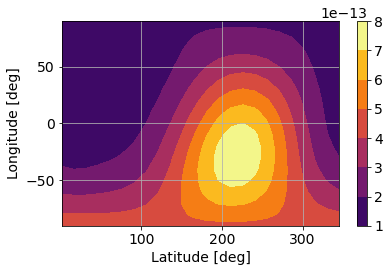

In [303]:
plt.figure()
plt.rcParams.update({"font.size": 14})
plt.xlabel("Latitude [deg]")
plt.ylabel("Longitude [deg]")
plt.contourf(phi, theta, rho, cmap='inferno', vmin=0, vmax=np.max(rho))
plt.colorbar()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"hasdm.png")